<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__NLP_M3_CaseStudy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study
ABC Company wants to perform some text analysis andmake visualizationfor one of their dataset.
The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home)

This is a dataset having tweets about 6 US Airlines along with their sentiments: positive, negative and neutral.

You are provided with this dataset named “Tweets.csv”. This is a snapshot of the dataset:

It has tweets in ‘text’ column and sentiments in ‘airline_sentiment’ column.

## Load the Dataset

In [13]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

#Load the dataset from Kaggle
! pip install -q opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment')

Skipping, found downloaded files in "./twitter-airline-sentiment" (use force=True to force download)


## About The Dataset & Model

As the original source says,

    A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to
    first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Import libraries

In [14]:
#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations

## Read the dataset

In [15]:
df = pd.read_csv('/content/twitter-airline-sentiment/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## 1.Retrieve all tags starting from ‘@’ in the entire dataset and save in a file called “References.txt”



In [16]:
import re

# Open the file for writing
with open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/References.txt", "w") as f:
    # Iterate through each tweet in the dataset
    for tweet in df["text"]:
        # Find all tags starting with '@'
        tags = re.findall(r"@\w+", tweet)
        # Write the tags to the file
        for tag in tags:
            f.write(tag + "\n")

## 2.Extract all noun phrases from their dataset and save them in different lines in a file named “Noun Phrasesfor <airline_sentiment> Review .txt” (You can choose your own grammar for noun phrase).Here <airline_sentiment> will have 3 different values: positive, negative and neutral so 3 files will be created.



In [17]:
# use spacy

import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Open the files for writing
positive_file = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Noun Phrasesfor Positive Review.txt", "w")
negative_file = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Noun Phrasesfor Negative Review.txt", "w")
neutral_file = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Noun Phrasesfor Neutral Review.txt", "w")

# Iterate through each tweet in the dataset
for tweet in df["text"]:
    # Parse the tweet with spaCy
    doc = nlp(tweet)

    # Extract the noun phrases
    for np in doc.noun_chunks:
        # Determine the sentiment of the tweet
        sentiment = df.loc[df["text"] == tweet, "airline_sentiment"].values[0]

        # Write the noun phrase to the appropriate file
        if sentiment == "positive":
            positive_file.write(np.text + "\n")
        elif sentiment == "negative":
            negative_file.write(np.text + "\n")
        elif sentiment == "neutral":
            neutral_file.write(np.text + "\n")

# Close the files
positive_file.close()
negative_file.close()
neutral_file.close()

## 3.Extract all verb phrases from their dataset and save them in different lines in a file named “Verb Phrases for <airline_sentiment> Review .txt”” (You can choose your own grammar for verb phrase).Here <airline_sentiment> will have 3 different values: positive , negative and neutral so 3 files will be created.


In [20]:
# use spacy

import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Open the files for writing
positive_file = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Verb Phrasesfor Positive Review.txt", "w")
negative_file = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Verb Phrasesfor Negative Review.txt", "w")
neutral_file = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Verb Phrasesfor Neutral Review.txt", "w")

# Iterate through each tweet in the dataset
for tweet in df["text"]:
    # Parse the tweet with spaCy
    doc = nlp(tweet)

    # Extract the verb phrases
    for token in doc:
        if token.pos_ == "VERB" : # Check if the token is a verb
          verb_phrase = " ".join([child.text for child in token.children]) # Build the phrase from its children
          # Determine the sentiment of the tweet
          sentiment = df.loc[df["text"] == tweet, "airline_sentiment"].values[0]

          # Write the verb phrase to the appropriate file
          if sentiment == "positive":
              positive_file.write(verb_phrase + "\n")
          elif sentiment == "negative":
              negative_file.write(verb_phrase + "\n")
          elif sentiment == "neutral":
              neutral_file.write(verb_phrase + "\n")

# Close the files
positive_file.close()
negative_file.close()
neutral_file.close()

## 4.For each sentiment, make a well labelled pie chart showing distribution of Noun Phrases and Verb Phrasesof that sentiment from the data set. Use the above created files to get the frequencies.

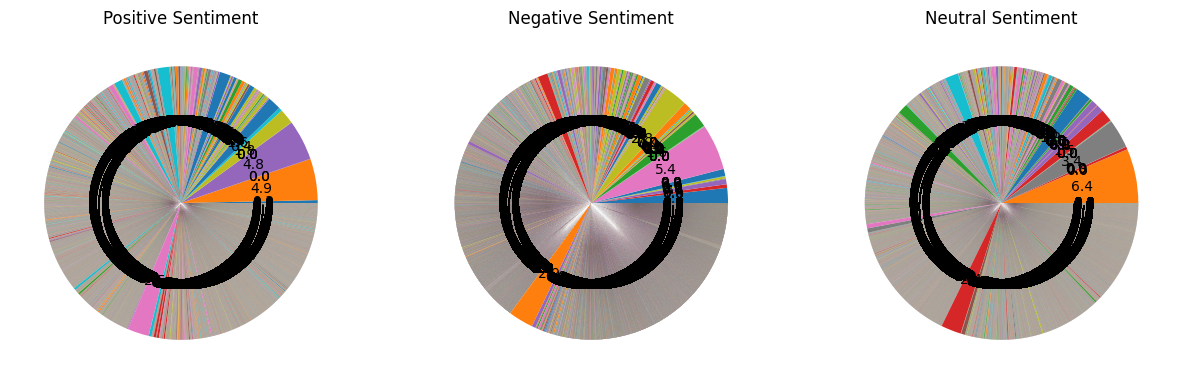

In [23]:
# Import libraries
import matplotlib.pyplot as plt

# Read the noun and verb phrase files
positive_nouns = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Noun Phrasesfor Positive Review.txt", "r").read().splitlines()
positive_verbs = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Verb Phrasesfor Positive Review.txt", "r").read().splitlines()
negative_nouns = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Noun Phrasesfor Negative Review.txt", "r").read().splitlines()
negative_verbs = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Verb Phrasesfor Negative Review.txt", "r").read().splitlines()
neutral_nouns = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Noun Phrasesfor Neutral Review.txt", "r").read().splitlines()
neutral_verbs = open("/content/drive/MyDrive/Colab Work/Edureka AI Certification/Assigment Files/Verb Phrasesfor Neutral Review.txt", "r").read().splitlines()

# Count the frequencies of noun and verb phrases
positive_noun_counts = {}
positive_verb_counts = {}
negative_noun_counts = {}
negative_verb_counts = {}
neutral_noun_counts = {}
neutral_verb_counts = {}

for noun in positive_nouns:
  positive_noun_counts[noun] = positive_noun_counts.get(noun, 0) + 1
for verb in positive_verbs:
  positive_verb_counts[verb] = positive_verb_counts.get(verb, 0) + 1
for noun in negative_nouns:
  negative_noun_counts[noun] = negative_noun_counts.get(noun, 0) + 1
for verb in negative_verbs:
  negative_verb_counts[verb] = negative_verb_counts.get(verb, 0) + 1
for noun in neutral_nouns:
  neutral_noun_counts[noun] = neutral_noun_counts.get(noun, 0) + 1
for verb in neutral_verbs:
  neutral_verb_counts[verb] = neutral_verb_counts.get(verb, 0) + 1

# Create the pie charts
plt.figure(figsize=(15, 10))

# Positive sentiment
plt.subplot(1, 3, 1)
sizes = list(positive_noun_counts.values()) + list(positive_verb_counts.values())
plt.pie(sizes, autopct="%1.1f")
plt.title("Positive Sentiment")

# Negative sentiment
plt.subplot(1, 3, 2)
sizes = list(negative_noun_counts.values()) + list(negative_verb_counts.values())
plt.pie(sizes,  autopct="%1.1f")
plt.title("Negative Sentiment")

# Neutral sentiment
plt.subplot(1, 3, 3)
sizes = list(neutral_noun_counts.values()) + list(neutral_verb_counts.values())
plt.pie(sizes,  autopct="%1.1f")
plt.title("Neutral Sentiment")

# Show the plot
plt.show()